In [37]:
import pandas as pd

# Use the full path you gave me
# The 'r' before the path makes it a "raw string" and ignores any special backslash issues
file_path = r'D:\manga\MACHINE,DEEP LEARNING\IBM\projects kaggle\1. مشاريع أساسية لإظهار المهارات التأسيسية\1. Titanic - Machine Learning from Disaster project'

try:
    # Load the files using the full path
    train_df = pd.read_csv(file_path + r'\train.csv')
    test_df = pd.read_csv(file_path + r'\test.csv')

    print("--- Data loaded successfully using the full path ---")
    print(train_df.head())

except FileNotFoundError:
    print("Error: The path is incorrect or the files are not in this path. Please check again.")

--- Data loaded successfully using the full path ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4 

In [38]:
print(test_df.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

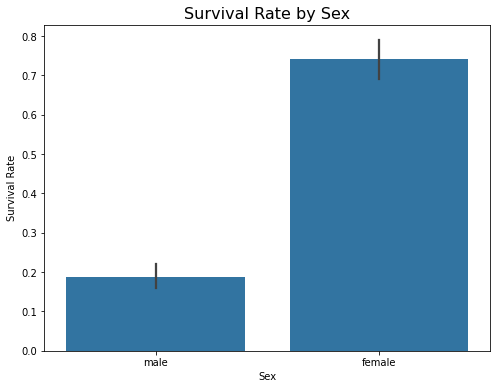

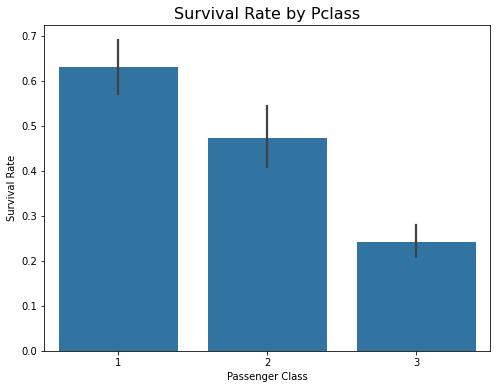

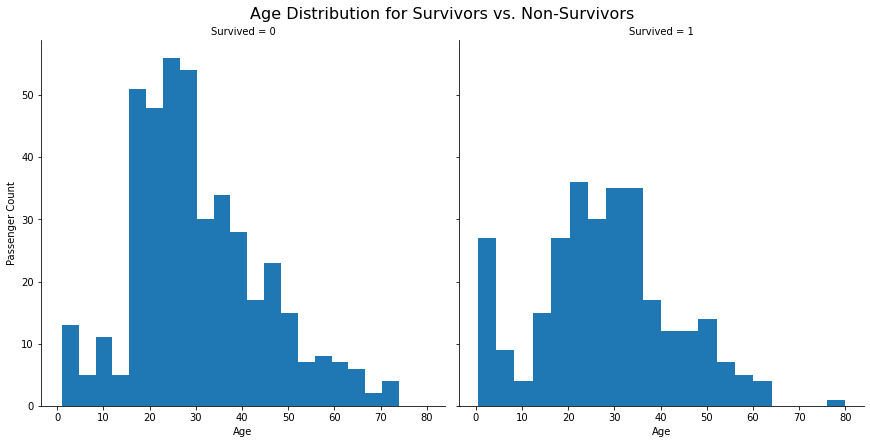

In [40]:

# Analyze and Visualize Data ---

# 1. Sex vs. Survival Analysis
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Sex', fontsize=16)
plt.ylabel('Survival Rate')
plt.xlabel('Sex')
plt.show() # Display the first plot

# 2. Pclass vs. Survival Analysis
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate by Pclass', fontsize=16)
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.show() # Display the second plot

# 3. Age vs. Survival Analysis
# Create a FacetGrid to compare age distributions
g = sns.FacetGrid(train_df, col='Survived', height=6)
# Map a histogram of Age
g.map(plt.hist, 'Age', bins=20)
g.set_axis_labels('Age', 'Passenger Count')
g.set_titles(col_template='Survived = {col_name}')
plt.suptitle('Age Distribution for Survivors vs. Non-Survivors', y=1.02, fontsize=16) # y=1.02 to raise the title slightly
plt.show() # Display the third plot

In [41]:
# Display the number of missing values in each column of the training data
print("Missing values in training data:")
print(train_df.isnull().sum())

print("\n" + "="*40 + "\n")

# Display the number of missing values in each column of the test data
print("Missing values in test data:")
print(test_df.isnull().sum())

Missing values in training data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Missing values in test data:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [42]:
# --- الخطوة 1: تحميل البيانات (البدء من الصفر) ---
train_path = r"D:\manga\MACHINE,DEEP LEARNING\IBM\projects kaggle\1. مشاريع أساسية لإظهار المهارات التأسيسية\1. Titanic - Machine Learning from Disaster project\train.csv"
test_path = r"D:\manga\MACHINE,DEEP LEARNING\IBM\projects kaggle\1. مشاريع أساسية لإظهار المهارات التأسيسية\1. Titanic - Machine Learning from Disaster project\test.csv"

try:
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)
    print("--- 1. تم تحميل البيانات بنجاح من المسار المحدد! ---")
except FileNotFoundError:
    print("خطأ: لم يتم العثور على الملفات في المسار المحدد. يرجى التأكد من صحة المسار.")
    exit()
# --- Step 1: Feature Engineering (This step is done first) ---
datasets = [train_df, test_df]
for dataset in datasets:
    # a) Extract titles from the Name column
    dataset['Title'] = dataset['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
    # b) Create a family size feature
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

print("--- New features created successfully ---")

# --- Step 2: Drop unhelpful columns (after we've used them) ---
# Now we can drop Name because we extracted Title from it
train_df = train_df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

print("--- Unnecessary columns dropped ---")

# --- Step 3: Complete the rest of the cleaning and processing steps ---
datasets = [train_df, test_df]
for dataset in datasets:
    # Fill missing values
    dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace=True)
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)

    # Process and group the 'Title' feature
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    # Convert all text data to numbers
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0) # To ensure no null values exist
    
    dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1}).astype(int)
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

print("--- Cleaning processes completed ---")
print("\n--- Final shape of the data ready for training ---")
print(train_df.head())

--- 1. تم تحميل البيانات بنجاح من المسار المحدد! ---
--- New features created successfully ---
--- Unnecessary columns dropped ---
--- Cleaning processes completed ---

--- Final shape of the data ready for training ---
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Title  \
0         0       3    0  22.0      1      0   7.2500         0      1   
1         1       1    1  38.0      1      0  71.2833         1      3   
2         1       3    1  26.0      0      0   7.9250         0      2   
3         1       1    1  35.0      1      0  53.1000         0      3   
4         0       3    0  35.0      0      0   8.0500         0      1   

   FamilySize  
0           2  
1           2  
2           1  
3           2  
4           1  


In [43]:
# --- The code assumes that train_df and test_df have been successfully cleaned and processed ---
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# --- 1. Separate features (X) from the target (Y) ---
# X_features contains all columns except 'Survived'
X_features = train_df.drop('Survived', axis=1)
# Y_target contains only the 'Survived' column
Y_target = train_df['Survived']

# --- 2. Split the data into a training set and a testing/validation set ---
# test_size=0.2 means we will use 20% of the data for validation and 80% for training
# random_state=42 ensures that the split is done the same way every time we run the code
X_train, X_test, y_train, y_test = train_test_split(
    X_features, Y_target, test_size=0.2, random_state=42
)

# --- 3. Build and train the model ---
# Create an instance of the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000) # We increase max_iter to ensure the model converges

# Train the model using the training data
log_reg_model.fit(X_train, y_train)

# --- 4. Make predictions on the validation data ---
y_predictions = log_reg_model.predict(X_test)

# --- 5. Evaluate the model's performance ---
# We calculate the accuracy by comparing the predictions (y_predictions) with the actual answers (y_test)
accuracy = accuracy_score(y_test, y_predictions)

print(f"--- The model has been trained successfully! ---")
# Convert the accuracy to a percentage
print(f"Model accuracy on validation data: {accuracy * 100:.2f}%")

--- The model has been trained successfully! ---
Model accuracy on validation data: 78.21%


In [44]:
# --- The code assumes that log_reg_model has been trained and test_df has been cleaned ---
# --- 1. Prepare the test data ---
# The columns in the test data must be the same as those the model was trained on
# We drop 'PassengerId' before feeding the data to the model
X_final_test = test_df.drop("PassengerId", axis=1).copy()

# --- 2. Make final predictions ---
# We use our trained model to predict survivors in the test data
final_predictions = log_reg_model.predict(X_final_test)

# --- 3. Create the Submission File ---
# We create a new DataFrame containing only two columns
# PassengerId from the original test data, and Survived from our predictions
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": final_predictions
})

In [45]:
# --- 4. Save the file ---
# We save the DataFrame to a CSV file.
# index=False is very important so the index column is not added to the final file
submission.to_csv('submission.csv', index=False)

print("--- 'submission.csv' file created successfully! ---")
print("These are the first 5 rows of your submission file:")
print(submission.head(20))

--- 'submission.csv' file created successfully! ---
These are the first 5 rows of your submission file:
    PassengerId  Survived
0           892         0
1           893         1
2           894         0
3           895         0
4           896         1
5           897         0
6           898         1
7           899         0
8           900         1
9           901         0
10          902         0
11          903         0
12          904         1
13          905         0
14          906         1
15          907         1
16          908         0
17          909         0
18          910         1
19          911         1


In [46]:
# --- الخطوة 1: تحميل البيانات (البدء من الصفر) ---
train_path = r"D:\manga\MACHINE,DEEP LEARNING\IBM\projects kaggle\1. مشاريع أساسية لإظهار المهارات التأسيسية\1. Titanic - Machine Learning from Disaster project\train.csv"
test_path = r"D:\manga\MACHINE,DEEP LEARNING\IBM\projects kaggle\1. مشاريع أساسية لإظهار المهارات التأسيسية\1. Titanic - Machine Learning from Disaster project\test.csv"

try:
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)
    print("--- 1. تم تحميل البيانات بنجاح من المسار المحدد! ---")
except FileNotFoundError:
    print("خطأ: لم يتم العثور على الملفات في المسار المحدد. يرجى التأكد من صحة المسار.")
    exit()
    # Let's assume train_df and test_df are the original dataframes
for dataset in [train_df, test_df]:
    # We use Regular Expressions to extract the title
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Display the titles we extracted
print(train_df['Title'].unique())

# We can group rare titles into a single category like 'Rare'
# Then convert them to numbers as we did with 'Sex' and 'Embarked'

--- 1. تم تحميل البيانات بنجاح من المسار المحدد! ---
['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


In [47]:
# --- The code assumes train_df and test_df contain the new 'Title' column ---

for dataset in [train_df, test_df]:
    # Step 1: Standardize similar titles
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    # Step 2: Group rare titles into a single category
    rare_titles = ['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
    dataset['Title'] = dataset['Title'].replace(rare_titles, 'Rare')

# Now let's display the titles after cleaning to verify
print("Titles after cleaning:", train_df['Title'].unique())

# Step 3: Convert titles to numbers
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in [train_df, test_df]:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    # We fill any resulting NaN values with 0
    dataset['Title'] = dataset['Title'].fillna(0)

print("\n--- Data after adding and encoding the 'Title' column ---")
print(train_df.head())

Titles after cleaning: ['Mr' 'Mrs' 'Miss' 'Master' 'Rare']

--- Data after adding and encoding the 'Title' column ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Title  
0      0         A/5 21171   7.2500   NaN        S      1  
1      0          PC 17599  71.2833   C85        C      3  
2      0  STON/O2. 310

In [48]:
# --- The code assumes train_df and test_df have been loaded ---

for dataset in [train_df, test_df]:
    # FamilySize = Number of Siblings/Spouses + Number of Parents/Children + 1 (the passenger themselves)
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

print("--- 'FamilySize' feature created successfully ---")

# Let's see an example of the new feature with the original columns for clarification
print(train_df[['FamilySize', 'SibSp', 'Parch', 'Survived']].head())

--- 'FamilySize' feature created successfully ---
   FamilySize  SibSp  Parch  Survived
0           2      1      0         0
1           2      1      0         1
2           1      0      0         1
3           2      1      0         1
4           1      0      0         0


In [49]:
# Display survival rate for each family size
survival_rate_by_family_size = train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

print("\n--- Survival rate based on family size ---")
print(survival_rate_by_family_size)


--- Survival rate based on family size ---
   FamilySize  Survived
3           4  0.724138
2           3  0.578431
1           2  0.552795
6           7  0.333333
0           1  0.303538
4           5  0.200000
5           6  0.136364
7           8  0.000000
8          11  0.000000


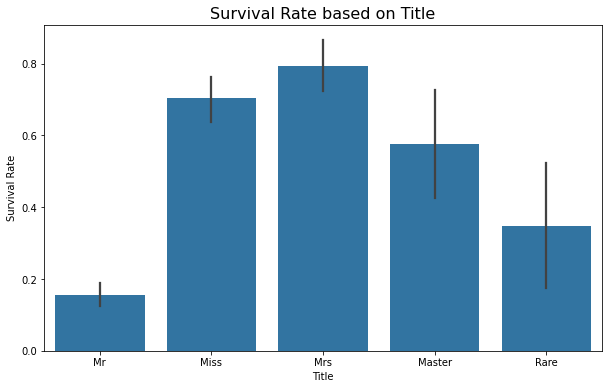

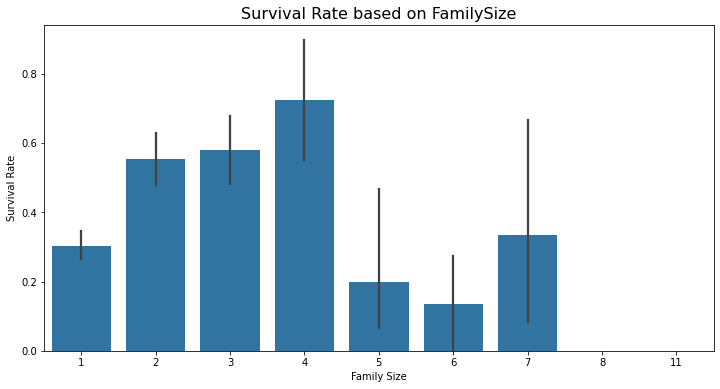

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# -1. Plotting the impact of the Title feature on Survival ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Title', y='Survived', data=train_df)
plt.title('Survival Rate based on Title', fontsize=16)
plt.ylabel('Survival Rate')
plt.xlabel('Title')
#Mapping: {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Mr', 'Miss', 'Mrs', 'Master', 'Rare'])
plt.show()


# -2. Plotting the impact of the FamilySize feature on Survival ---
plt.figure(figsize=(12, 6))
sns.barplot(x='FamilySize', y='Survived', data=train_df)
plt.title('Survival Rate based on FamilySize', fontsize=16)
plt.ylabel('Survival Rate')
plt.xlabel('Family Size')
plt.show()

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# --- Step 1: Load Data (Starting from scratch) ---
# Note: The Arabic in the file path is kept as changing it would break the code.
train_path = r"D:\manga\MACHINE,DEEP LEARNING\IBM\projects kaggle\1. مشاريع أساسية لإظهار المهارات التأسيسية\1. Titanic - Machine Learning from Disaster project\train.csv"
test_path = r"D:\manga\MACHINE,DEEP LEARNING\IBM\projects kaggle\1. مشاريع أساسية لإظهار المهارات التأسيسية\1. Titanic - Machine Learning from Disaster project\test.csv"

try:
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)
    print("--- 1. Data loaded successfully from the specified path! ---")
except FileNotFoundError:
    print("Error: Files not found at the specified path. Please make sure the path is correct.")
    exit()

# --- Step 2: Feature Engineering ---
datasets = [train_df, test_df]
for dataset in datasets:
    dataset['Title'] = dataset['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
print("--- 2. New features created (Title, FamilySize) ---")

# --- Step 3: Clean and Process Data ---
# a) Drop original columns that are no longer needed
train_df = train_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# b) Fill missing values and convert everything to numbers
datasets = [train_df, test_df]
for dataset in datasets:
    # Fill missing values
    dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace=True)
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)

    # Process and convert 'Title'
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Mlle', 'Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping).fillna(0)
    
    # Convert 'Sex' and 'Embarked'
    dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1}).astype(int)
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
print("--- 3. All data has been successfully cleaned and processed ---")

# --- Step 4: Train and Evaluate the Model ---
# Separate features from the target
X_features = train_df.drop(['Survived', 'PassengerId'], axis=1)
Y_target = train_df['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_features, Y_target, test_size=0.2, random_state=42)

# Build and train the model
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
random_forest_model.fit(X_train, y_train)

# Evaluate performance
y_predictions = random_forest_model.predict(X_test)
accuracy = accuracy_score(y_test, y_predictions)
print(f"\n--- 4. Model trained successfully! ---")
print(f">>> Final model accuracy: {accuracy * 100:.2f}% <<<")

# --- Step 5: Create the Final Submission File ---
# Prepare the test data
X_final_test = test_df.drop("PassengerId", axis=1).copy()

# Make predictions
final_predictions = random_forest_model.predict(X_final_test)

# Create and save the file
submission = pd.DataFrame({"PassengerId": test_df["PassengerId"], "Survived": final_predictions})
submission.to_csv('submission_final.csv', index=False)

print("\n--- 5. 'submission_final.csv' file created successfully! ---")
print(submission.head())

--- 1. Data loaded successfully from the specified path! ---
--- 2. New features created (Title, FamilySize) ---
--- 3. All data has been successfully cleaned and processed ---

--- 4. Model trained successfully! ---
>>> Final model accuracy: 82.68% <<<

--- 5. 'submission_final.csv' file created successfully! ---
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


In [52]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


# --- Step 4: Find the best model using GridSearchCV ---
X_features = train_df.drop(['Survived', 'PassengerId'], axis=1)
Y_target = train_df['Survived']

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_leaf': [2, 4]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

print("\n--- 4. Starting the search for the best parameters... ---")
grid_search.fit(X_features, Y_target)

print("\n--- Search finished! ---")
print("Best parameters found:", grid_search.best_params_)
print(f"Best accuracy achieved: {grid_search.best_score_ * 100:.2f}%")

# --- Step 5: Create the final submission file using the best model ---
best_model = grid_search.best_estimator_
X_final_test = test_df.drop("PassengerId", axis=1).copy()
final_predictions = best_model.predict(X_final_test)

submission = pd.DataFrame({"PassengerId": test_df["PassengerId"], "Survived": final_predictions})
submission.to_csv('submission_best_model.csv', index=False)

print("\n--- 5. 'submission_best_model.csv' file created successfully! ---")
print(submission.head())


--- 4. Starting the search for the best parameters... ---
Fitting 3 folds for each of 8 candidates, totalling 24 fits

--- Search finished! ---
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 100}
Best accuracy achieved: 83.61%

--- 5. 'submission_best_model.csv' file created successfully! ---
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0


In [53]:
# Binning 'Fare' into 4 categories based on quantiles (because its distribution is skewed)
for dataset in [train_df, test_df]:
    dataset['Fare_Bin'] = pd.qcut(dataset['Fare'], 4, labels=False)

# Binning 'Age' into 5 age categories
for dataset in [train_df, test_df]:
    dataset['Age_Bin'] = pd.cut(dataset['Age'].astype(int), bins=5, labels=False)

# Now we can drop the original columns
# train_df = train_df.drop(['Age', 'Fare'], axis=1)
# test_df = test_df.drop(['Age', 'Fare'], axis=1)

In [54]:
for dataset in [train_df, test_df]:
    dataset['Is_Alone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'Is_Alone'] = 1

In [55]:
from sklearn.preprocessing import StandardScaler

# Select the numerical columns you want to scale
numerical_features = ['Age', 'Fare'] # or Age_Bin and Fare_Bin if you used them

scaler = StandardScaler()

# Important note: We use fit_transform on the training data
# but we only use transform on the test data to avoid data leakage
train_df[numerical_features] = scaler.fit_transform(train_df[numerical_features])
test_df[numerical_features] = scaler.transform(test_df[numerical_features])

In [56]:
!pip install xgboost


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# --- Step 1: Load Data (Starting from scratch) ---
# Note: The Arabic in the file path is kept as changing it would break the code.
train_path = r"D:\manga\MACHINE,DEEP LEARNING\IBM\projects kaggle\1. مشاريع أساسية لإظهار المهارات التأسيسية\1. Titanic - Machine Learning from Disaster project\train.csv"
test_path = r"D:\manga\MACHINE,DEEP LEARNING\IBM\projects kaggle\1. مشاريع أساسية لإظهار المهارات التأسيسية\1. Titanic - Machine Learning from Disaster project\test.csv"

try:
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)
    print("--- 1. Data loaded successfully from the specified path! ---")
except FileNotFoundError:
    print("Error: Files not found at the specified path. Please make sure the path is correct.")
    exit()

# --- Step 2: Feature Engineering ---
datasets = [train_df, test_df]
for dataset in datasets:
    # Basic features
    dataset['Title'] = dataset['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    # Advanced features
    dataset['Is_Alone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'Is_Alone'] = 1
print("--- 2. New features created successfully ---")

# --- Step 3: Clean and Process Data ---
train_df = train_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
datasets = [train_df, test_df]
for dataset in datasets:
    dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace=True)
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)
    
    # Process 'Title'
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Mlle', 'Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping).fillna(0)
    
    # Convert the rest
    dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1}).astype(int)
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
print("--- 3. All data has been successfully cleaned and processed ---")

# --- Step 4: Train and Evaluate XGBoost Model ---
X_features = train_df.drop(['Survived', 'PassengerId'], axis=1)
Y_target = train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X_features, Y_target, test_size=0.2, random_state=42)

# Build and train the model
# use_label_encoder=False and eval_metric='logloss' to avoid warnings
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Evaluate performance
y_predictions_xgb = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_predictions_xgb)
print(f"\n--- 4. XGBoost model trained successfully! ---")
print(f">>> XGBoost model accuracy: {accuracy * 100:.2f}% <<<")

# --- Step 5: Create the Final Submission File ---
X_final_test = test_df.drop("PassengerId", axis=1).copy()
final_predictions_xgb = xgb_model.predict(X_final_test)

submission_xgb = pd.DataFrame({"PassengerId": test_df["PassengerId"], "Survived": final_predictions_xgb})
submission_xgb.to_csv('submission_xgboost.csv', index=False)

print("\n--- 5. 'submission_xgboost.csv' file created successfully! ---")
print(submission_xgb.head())

--- 1. Data loaded successfully from the specified path! ---
--- 2. New features created successfully ---
--- 3. All data has been successfully cleaned and processed ---


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [01:52:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- 4. XGBoost model trained successfully! ---
>>> XGBoost model accuracy: 83.24% <<<

--- 5. 'submission_xgboost.csv' file created successfully! ---
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         1
4          896         1


In [58]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# --- Step 4: Train and Evaluate the Model ---
X_features = train_df_cleaned.drop(['Survived', 'PassengerId'], axis=1)
Y_target = train_df_cleaned['Survived']
X_train, X_test, y_train, y_test = train_test_split(X_features, Y_target, test_size=0.2, random_state=42)

lgbm_model = lgb.LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

y_predictions_lgbm = lgbm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_predictions_lgbm)

print(f"--- 4. LightGBM model trained successfully! ---")
print(f"LightGBM model accuracy: {accuracy * 100:.2f}%")

# --- Step 5: Create the Final Submission File ---
X_final_test = test_df_cleaned.drop("PassengerId", axis=1).copy()
final_predictions_lgbm = lgbm_model.predict(X_final_test)

# ## Final adjustment here: We use the original test_df that we loaded in Step 1 ##
submission_lgbm = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": final_predictions_lgbm
})

submission_lgbm.to_csv('submission_lightgbm.csv', index=False)

print("\n--- 5. 'submission_lightgbm.csv' file created successfully! ---")
print(submission_lgbm.head())

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [59]:
y_predictions_lgbm = lgbm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_predictions_lgbm)

print(f"--- 4. LightGBM model trained successfully! ---")
print(f"LightGBM model accuracy: {accuracy * 100:.2f}%")

--- 4. LightGBM model trained successfully! ---
LightGBM model accuracy: 84.92%
